In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

## LOCAL OUTLIER FACTOR

In [2]:
#Generating data with outliers
np.random.seed(42)
x_inliers = 0.3 * np.random.randn(100, 2)
x_inliers = np.r_[x_inliers + 2, x_inliers - 2]
x_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
x = np.r_[x_inliers, x_outliers]

df = pd.DataFrame(x, columns=['Feature1', 'Feature2'])
df

,Feature1,Feature2
0,2.149014,1.958521
1,2.194307,2.456909
2,1.929754,1.929759
3,2.473764,2.230230
4,1.859158,2.162768
...,...,...
215,-2.983516,0.177946
216,2.159948,-2.273432
217,0.983124,-3.317220
218,-3.586546,0.250837


Percentage of outliers : Outlier
 1    90.0
-1    10.0
Name: count, dtype: float64


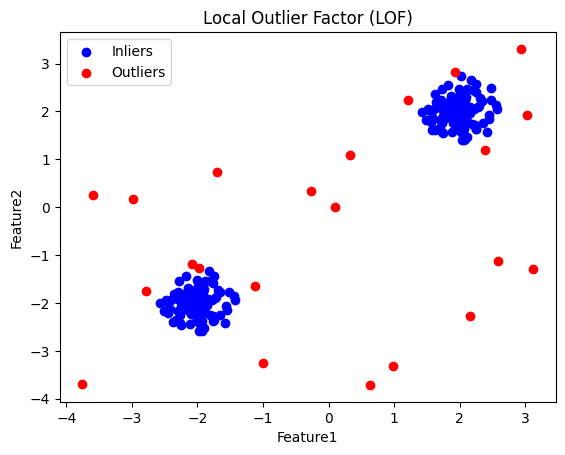

In [3]:
from sklearn.neighbors import LocalOutlierFactor

def localoutlierfactor(df):
    lof = LocalOutlierFactor(n_neighbors= 20 , contamination= 0.1)
    y_pred = lof.fit_predict(df)
    df['Outlier'] = y_pred
    print(f"Percentage of outliers : {(df['Outlier'].value_counts() / len(df)) * 100}")
    
    # Plot the inliers and outliers
def plot_outliers(df, feature1, feature2):
    plt.scatter(df.loc[df.Outlier == 1, feature1], df.loc[df.Outlier == 1, feature2], color='b', label='Inliers')
    plt.scatter(df.loc[df.Outlier == -1, feature1], df.loc[df.Outlier == -1, feature2], color='r', label='Outliers')
    plt.legend()
    plt.title('Local Outlier Factor (LOF)')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()
    
localoutlierfactor(df)
plot_outliers(df, 'Feature1' , 'Feature2')


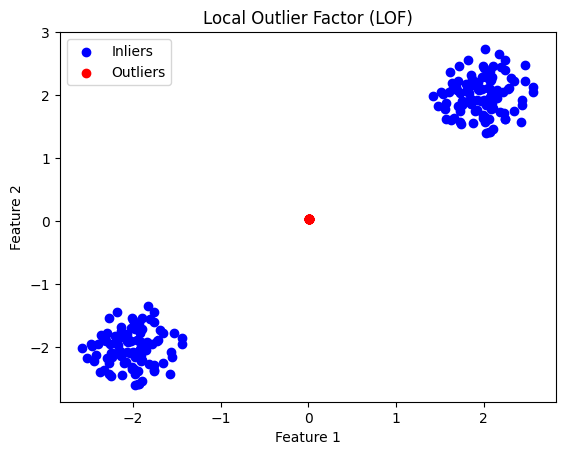

In [4]:
##Fixing the outliers with mean / median values

#copying the dataset 
df_mean = df.copy()
for feature in df_mean.drop('Outlier' , axis = 1):
    #calculate the mean of inliners 
    mean = df_mean.loc[df_mean['Outlier'] == 1 , feature].mean()
    #replace the outliers with mean
    df_mean.loc[df_mean['Outlier'] == -1 , feature] = mean
    
lof = LocalOutlierFactor(n_neighbors= 20 , contamination= 0.1)
y_pred = lof.fit_predict(df_mean)
df_mean['Outlier'] = y_pred
df_mean

plt.scatter(df_mean.loc[df.Outlier == 1, 'Feature1'], df_mean.loc[df.Outlier == 1, 'Feature2'], color='b', label='Inliers')
plt.scatter(df_mean.loc[df.Outlier == -1, 'Feature1'], df_mean.loc[df.Outlier == -1, 'Feature2'], color='r', label='Outliers')
plt.legend()
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()